<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/finance/%EA%B8%88%EC%9C%B5_%EA%B3%B5%ED%95%99_5%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경제 변동 사건

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bg4Oax/btrw63Y1Tqg/EtYdDHbT73wWNx8kSV2yuK/img.png">

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/b8ZIP4/btrw2OBQeAz/3k6ikpRgyzXSWiKXtXWf6k/img.png" /><br>


<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/9Zrvm/btrw63SfJcq/4zdO8MQyNKi03PbOGYc0SK/img.png" /><br>


<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/OMvWc/btrw5PUreVQ/o2wdb6rp8g69HkGql42RaK/img.png" /><br>


<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/dmejJE/btrwZZcw02u/YMKFSdlgpEe9h9Tx1g8gk1/img.png" /><br>


<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bpE84b/btrw5PNKzqk/Arw04rSSRXoaHJwjzD2zMk/img.png" /><br>


* 10년 주기로 경제 상황에 변동이 있음<IMF, 서브프라임모기지, 유가폭등>

# 금융 Pandas
* FinanceDataReader
* pykrx
* Yahoo Finance + pandas datareader

# DATA LOAD
* 2020~2021 삼성, 테슬라 주가 데이터

In [42]:
#!pip install yfinance
#!pip install finance-datareader
#!pip install pykrx

In [43]:
import FinanceDataReader as fdr
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from pykrx import stock

In [44]:
dfss=pdr.get_data_yahoo('005930.KS',start="2020-01-01",end="2020-12-31")
dfts=pdr.get_data_yahoo('TSLA',start="2020-01-01",end="2020-12-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
dfss.shape, dfts.shape

((248, 6), (252, 6))

In [46]:
dfss.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51824.093750,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,52105.750000,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,52105.750000,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,52387.402344,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,53326.238281,23501171


In [47]:
df_ss = fdr.DataReader('005930',  '2020-01-01', '2020-12-31')
df_ts = fdr.DataReader('TSLA'     , '2020-01-01', '2020-12-31')

In [48]:
print(df_ss.shape, df_ts.shape)
df_ss.head()

(248, 6) (253, 6)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [49]:
df_ts.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,86.05,84.90,86.14,84.34,47790000.0,0.0284
2020-01-03,88.60,88.10,90.80,87.38,88970000.0,0.0296
2020-01-06,90.31,88.09,90.31,88.00,50790000.0,0.0193
2020-01-07,93.81,92.28,94.33,90.67,91050000.0,0.0388
2020-01-08,98.43,94.74,99.70,93.65,156000000.0,0.0492


In [51]:
#!pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=71cd7ee151985dca1cc5243312f9330a734ec752d610f7d99cd3a96e22d1f2bb
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


# 차트(plotly)

### backend = "plotly" 사용

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import chart_studio.plotly as ply
import chart_studio
chart_studio.tools.set_credentials_file(username='', api_key='')
pd.options.plotting.backend = "plotly"

In [72]:
df = pd.DataFrame(dict(ss = df_ss['Close'], ts = df_ts['Close']))
fig = df.plot()
fig.show()

### go(graph_objects) 사용

In [73]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(go.Scatter(y=df_ss['Close']))
fig.add_scatter(y=df_ts['Close'])
fig.update_layout(title_text='Stock price of SAMSUNG & TESLA', width=500, height=400)

### y축 이중차트 사용

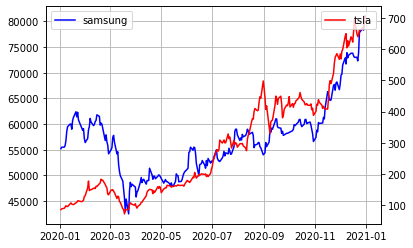

In [74]:
fig, ax1 = plt.subplots()
ax1.plot(df_ss.index, df_ss['Close'], label='samsung', color='blue')
ax1.legend(loc=2)
ax1.grid()

ax2 = ax1.twinx()  #----------------------y중 이중차트 사용해 비교 가능
ax2.plot(df_ts.index, df_ts['Close'], label='tsla', color='red')
ax2.legend(loc=1)
plt.show()

# 지수화
* <font color=red><b>가격이 다른 두 주가의 수익 비교

## 변동가 (수익가)
* 변동가 = 오늘종가 - 어제종가   

In [55]:
df_ss.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


### shift(N)

In [56]:
df_ss['shift'] = df_ss['Close'].shift(1)
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0


### 결측채우기

In [57]:
df_ss = df_ss.fillna(method='bfill')
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0


In [58]:
# df_ss['chg_price'] = df_ss['Close'] - df_ss['Close'].shift(1)
df_ss['chg_price'] = df_ss['Close'] - df_ss['shift']
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift,chg_price
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0,1000.0


### diff(1)
* <font color=blue><b> diff(N)</b></font> = <font color=red><b>df['Close'] - df['Close'].fhift(N)
* <font color=red><b> N일 대비 가격 증감에 주로 사용

In [59]:
df_ss['chg_price2'] = df_ss['Close'].diff(1)
df_ss = df_ss.fillna(method='bfill')
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0,300.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0,300.0,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0,1000.0,1000.0


## 변동률 (수익률)

### (오늘 - 전일) / 전일 
* % : (오늘 - 전일) / 전일 * 100

In [60]:
df_ss['chg_rate'] = ((df_ss['Close'] - df_ss['shift']) / df_ss['shift'] )
df_ss = df_ss.fillna(method='bfill')
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2,chg_rate
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0,300.0,0.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0,300.0,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0,0.0,0.0,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0,300.0,300.0,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0,1000.0,1000.0,0.017921


### pct_change(N)
* <font color=red><b> N일 대비 수익률에 주로 사용

In [61]:
df_ss['chg_rate2'] = df_ss['Close'].pct_change(1) 
df_ss = df_ss.fillna(method='bfill')
df_ss.head()

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2,chg_rate,chg_rate2
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0,300.0,0.000000,0.005435
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0,300.0,0.005435,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0,0.0,0.0,0.000000,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0,300.0,300.0,0.005405,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0,1000.0,1000.0,0.017921,0.017921


## 누적 수익가

In [62]:
temp = df_ss[:'2020-02-01'].copy()
temp.head(2)

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2,chg_rate,chg_rate2
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0,300.0,0.000000,0.005435
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0,300.0,0.005435,0.005435


In [63]:
temp['cumsum'] = temp['chg_price'].cumsum()
temp.tail()
print(temp.iloc[-1]['cumsum']) #---맨 마지막 레코드의 가격
print(temp['chg_price'].sum()) #---모든 레코드의 총합

1200.0
1200.0


## 누적 수익률
* <font color=red size=3><b> 덧셈이 아닌 곱셈을 해야 한다. 
* (1+r1)*(1+r2)-1 
* (temp['change_rate']+1).cumprod()-1


In [64]:
temp['cumsum_rate'] = (temp['chg_rate']+1).cumprod() -1
temp.tail()
print(f"최초 매수가 : {temp.iloc[0]['Close']}")
print(f"누적 수익률 : {temp.iloc[-1]['cumsum_rate']}")

최초 매수가 : 55200.0
누적 수익률 : 0.02173913043478226


### 월간 누적 수익률
* 적용기간 : start='2020-01-01', end='2020-12-31'

In [65]:
type(df_ss.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [66]:
df_ss['month'] = df_ss.index.month
df_ss.tail(2)

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2,chg_rate,chg_rate2,month
Date,,,,,,,,,,,,
2020-12-29,78800,78900,77300,78300,30339449,-0.005083,78700.0,-400.0,-400.0,-0.005083,-0.005083,12
2020-12-30,77400,81300,77300,81000,29417421,0.034483,78300.0,2700.0,2700.0,0.034483,0.034483,12


## 변동성 추이

### 일별 가격 추이

In [67]:
df_ss['chg_price'].plot()

### 누적 변동가 추이

In [68]:
df_ss['chg_price'].cumsum().plot()

### 누적 변동률 추이

In [69]:
df_ss['chg_rate+1'] = df_ss['chg_rate']+1

In [70]:
(df_ss.groupby(by='month')['chg_rate+1'].prod()-1).plot()

In [76]:
(df_ss['chg_rate+1'].cumprod()-1).plot()

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/csc0Xt/btrw6gybAJR/GwE3st0Efnrnug4wEMqZ5K/img.png" /><br>

# 이동평균

## rolling(window=N)
* <font color=red><b> N일 간격으로 그룹한 집계값(평균)-->이동평균</b></font>
* 주로 이동평균에 사용

In [95]:
temp['ma3']=temp['Close'].rolling(3).mean()
temp['ma5']=temp['Close'].rolling(5).mean()
temp.head()

,Open,High,Low,Close,Volume,Change,shift,chg_price,chg_price2,chg_rate,chg_rate2,cumsum,cumsum_rate,ma5,ma3
Date,,,,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.0,0.0,300.0,0.000000,0.005435,0.0,0.000000,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55200.0,300.0,300.0,0.005435,0.005435,300.0,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55500.0,0.0,0.0,0.000000,0.000000,300.0,0.005435,NaN,55400.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55500.0,300.0,300.0,0.005405,0.005405,600.0,0.010870,NaN,55600.000000
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55800.0,1000.0,1000.0,0.017921,0.017921,1600.0,0.028986,55760.0,56033.333333


In [103]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(go.Scatter(y=temp['Close'], name='Close'))
fig.add_scatter(y=temp['ma3'], name='ma3')
fig.add_scatter(y=temp['ma5'], name='ma5')
fig.update_layout(title_text='Stock price of SAMSUNG', width=500, height=400)

# 샘플링

## resampling
ref : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

* DataFrame.resample
                초(Second)       S
                분(Minute)       M
                시(Hour)         H
                주(Weekly)       W
                월(Monthly)      M
                분기(Quaterly)   Q
                연(Yearly)       A , M
                영업일(Business) B (주말만 제외되고 공휴일은 제외되지 않음)


In [104]:
temp['Close'].resample(rule='W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
Freq: W-SUN, Name: Close, dtype: float64

In [105]:
temp['Close'].rolling(5).mean()

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06        NaN
2020-01-07        NaN
2020-01-08    55760.0
2020-01-09    56440.0
2020-01-10    57240.0
2020-01-13    58140.0
2020-01-14    58980.0
2020-01-15    59420.0
2020-01-16    59840.0
2020-01-17    60200.0
2020-01-20    60680.0
2020-01-21    60960.0
2020-01-22    61620.0
2020-01-23    61640.0
2020-01-28    61140.0
2020-01-29    60480.0
2020-01-30    59640.0
2020-01-31    58460.0
Name: Close, dtype: float64

* 매달 초

In [106]:
df_ss['Close'].resample(rule='MS').mean()

Date
2020-01-01    58815.000000
2020-02-01    59085.000000
2020-03-01    50168.181818
2020-04-01    49045.000000
2020-05-01    49100.000000
2020-06-01    52986.363636
2020-07-01    54726.086957
2020-08-01    56980.000000
2020-09-01    58176.190476
2020-10-01    59736.842105
2020-11-01    63419.047619
2020-12-01    73619.047619
Freq: MS, Name: Close, dtype: float64

* 매달 말

In [107]:
df_ss['Close'].resample(rule='M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
Freq: M, Name: Close, dtype: float64

# Samsung vs TSLA 년간 가격 변동 추이(변동성 추이)

In [77]:
df_ss = fdr.DataReader('005930',  '2020-01-01', '2020-12-31')
df_ts = fdr.DataReader('TSLA'     , '2020-01-01', '2020-12-31')

In [87]:
df_ss['cumprod']= (1+df_ss['Close'].pct_change(1)).cumprod()-1 #--변동률
df_ts['cumprod']= (1+df_ts['Close'].pct_change(1)).cumprod()-1

In [88]:
df_ss=df_ss.fillna(method='bfill')
df_ts=df_ts.fillna(method='bfill')

In [89]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(go.Scatter(y=df_ss['cumprod']))
fig.add_scatter(y=df_ts['cumprod'])
fig.update_layout(title_text='Stock price of SAMSUNG & TESLA', width=500, height=400)

In [90]:
df = pd.DataFrame(dict(ss = df_ss['cumprod'], ts = df_ts['cumprod']))
fig = df.plot()
fig.show()

In [ ]:
<img  width="700" height="400" src="url" /><br>

# 키움증권 수익률 계산 예시
* https://taes-note.tistory.com/97